## 이미지의 대표 색상 추출

참고 코드: https://github.com/soryeongk/color_on_seoul_cafe/blob/master/code_image_clustering/code_ImgCluster_soryeong_ver08.ipynb

In [104]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc

In [105]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar
    
def centroid_histogram(clt):
    '''
    # 히스토그램 형식으로 색을 반,
    각 클러스터의 픽셀의 숫자를 기반으로 함
    '''
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()  # hist = hist/hist.sum()

    # return the histogram
    return hist

In [106]:
def image_color_cluster(image_path, k = 5):
    image = cv2.imread(image_path)
    # image의 shape을 찍어보면, height, width, channel 순으로 나옴
    # channel은 RGB를 말함
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # cv에서는 RGB가 아닌 BGR 순으로 나오기 때문에 순서를 RGB로 전환
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    # shape의 0,1번째 즉, height와 width를 통합시킴

    clt = KMeans(n_clusters = k)  # 평균 알고리즘 KMeans
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    return bar

In [107]:
bar = image_color_cluster("C:/KUIAI2023/cool_brown.jpg")

c:\Users\황민아\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


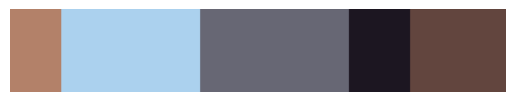

In [89]:
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [21]:
image = cv2.imread("C:/KUIAI2023/2997961300442446602.jpg")
image.shape

(1350, 1080, 3)

# RGB로 톤 구별

In [27]:
# 톤 구별 함수
def rgb_classfy(rgb):
    r = rgb[0]; g = rgb[1]; b = rgb[2]
    
    if ((r/g) >= 0.95 and (r/g) <= 1.05) and ((g/b) >= 0.95 and (g/b) <= 1.05) and ((r/g) >= 0.95 and (r/g) <= 1.05):
        return 'mono'
    elif r < 51 and g < 51 and b < 51:
        return 'mono'
    else:
        if r > b:
            return 'red'
        else:
            return 'blue'

In [37]:
image = cv2.imread("C:/KUIAI2023/2990154852678163783.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_list = [list(lst) for img in image for lst in img]

rb = [rgb_classfy(rgb) for rgb in image_list]

mono = rb.count('mono')
red = rb.count('red')
blue = rb.count('blue')

totalpixel = len(rb)

print("mono, red, blue: ", mono, red, blue)
print("totalpixel: ", totalpixel)


C:\Users\황민아\AppData\Local\Temp\ipykernel_19528\645712928.py:5: RuntimeWarning: invalid value encountered in ubyte_scalars
  if ((r/g) >= 0.95 and (r/g) <= 1.05) and ((g/b) >= 0.95 and (g/b) <= 1.05) and ((r/g) >= 0.95 and (r/g) <= 1.05):
C:\Users\황민아\AppData\Local\Temp\ipykernel_19528\645712928.py:5: RuntimeWarning: divide by zero encountered in ubyte_scalars
  if ((r/g) >= 0.95 and (r/g) <= 1.05) and ((g/b) >= 0.95 and (g/b) <= 1.05) and ((r/g) >= 0.95 and (r/g) <= 1.05):


mono, red, blue:  1166033 291055 912
totalpixel:  1458000


In [38]:
image.shape

(1350, 1080, 3)

# HSV로 색감 분석

H: hue. 색상. 0 ~ 179 \
S: saturation. 채도. 0 ~ 255 \
V: value. 밝기. 0 ~ 255\

## 채도 분석

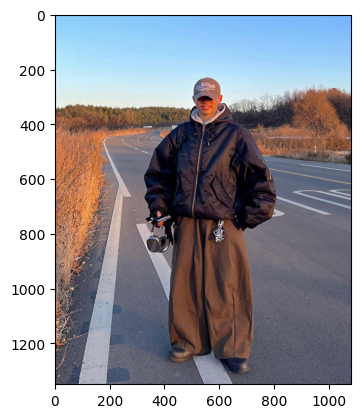

In [98]:
import matplotlib.pyplot as plt
import matplotlib.image as img

img_test = img.imread('C:/KUIAI2023/cool_brown.jpg')
plt.imshow(img_test)
plt.show()

average s2 채도: 79.81512277091906


C:\Users\황민아\AppData\Local\Temp\ipykernel_19528\1525531479.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s2, bins=9, kde=False)


<AxesSubplot: >

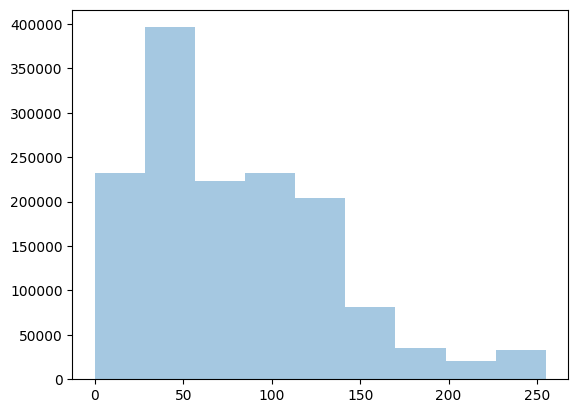

In [99]:
image = cv2.imread("C:/KUIAI2023/cool_brown.jpg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2.split - 채널 분리
h2, s2, v2 = cv2.split(hsv)

#채도 평균 값 확인
print("average s2 채도:", np.mean(s2))

# 채도 histogram 확인
import seaborn as sns
sns.distplot(s2, bins=9, kde=False)

## 명도 분석

average v2 명도: 146.06331618655693


C:\Users\황민아\AppData\Local\Temp\ipykernel_19528\2448612541.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v2, bins=9, kde=False)


<AxesSubplot: >

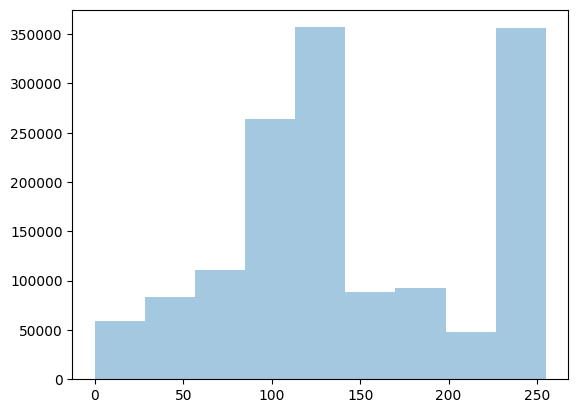

In [103]:
image = cv2.imread("C:/KUIAI2023/cool_brown.jpg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2.split - 채널 분리
h2, s2, v2 = cv2.split(hsv)

print("average v2 명도:", np.mean(v2))

# 채도 histogram 확인
import seaborn as sns
sns.distplot(v2, bins=9, kde=False)

# HSV 강도 시각화 코드

In [96]:
cv2.namedWindow("s2",0)
cv2.resizeWindow("s2", 800, 700)
cv2.imshow("s2", s2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [95]:
cv2.namedWindow("v2",0)
cv2.resizeWindow("v2", 800, 700)
cv2.imshow("v2", v2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)
ax.plot(x, y, z)